In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
def clean_traffic(value):
    value = value.replace(",", "").replace("+", "").strip()
    return int(value)

clusters = ['Economy','Technology and Science', 'Entertainment','Lifestyle','Accident','Geopolitical','Intellectualism']
countries = {'africa':['Kenya','Nigeria','SouthAfrica'],'europe':['Denmark','UK','Finland'],'north_america_australia':['Australia','Canada','USA'],'west_asia':['Malaysia','Philippines','Singapore']}
specific_category = clusters[2]
# country = countries['west_asia'][2]
country = countries['africa'][2]
# country = countries['west_asia'][2]
# country = countries['europe'][2]


#--------detailed labels--------#
# path = f'./output/regions/west_asia/classified_data/{country}_classification_output.csv'
# path = f'./output/regions/africa/classified_data/{country}_classification_output.csv'
# path = f'./output/regions/north_america_australia/{country}_data/Australia_classification_output.csv'
# path = f'./output/regions/europe/classified_data/{country}_classification_output.csv'

#--------general labels--------#
path = f"./output/regions/africa/clustered_classified_data/{country}_clustered_classified.csv"
# path = f'./output/regions/europe/clustered_classified_data/{country}_clustered_classified.csv'
# path = f'./output/regions/north_america_australia/clustered_classified_data/{country}_clustered_classified.csv'
# path = f'./output/regions/west_asia/clustered_classified_data/{country}_clustered_classified.csv'


data = pd.read_csv(path)


df = data[['date','predicted_label','traffic','general_label']]
df['traffic_numeric'] = df['traffic'].apply(clean_traffic)

topic_stats = df.groupby('general_label')['traffic_numeric'].agg(['mean']).sort_values('mean',ascending=True)
topic_stats

C:\Users\alkrd\AppData\Local\Temp\ipykernel_2568\966823200.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_numeric'] = df['traffic'].apply(clean_traffic)


,mean
general_label,
Economy,5666.666667
Geopolitical,6697.674419
Entertainment,7319.474836
Lifestyle,8130.952381
Intellectualism,12209.523810
Accident,17634.920635
Technology and Science,19326.530612


In [19]:
# topic_stats.plot(kind='bar', color='skyblue')

In [20]:
# df

C:\Users\alkrd\AppData\Local\Temp\ipykernel_2568\1617459004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


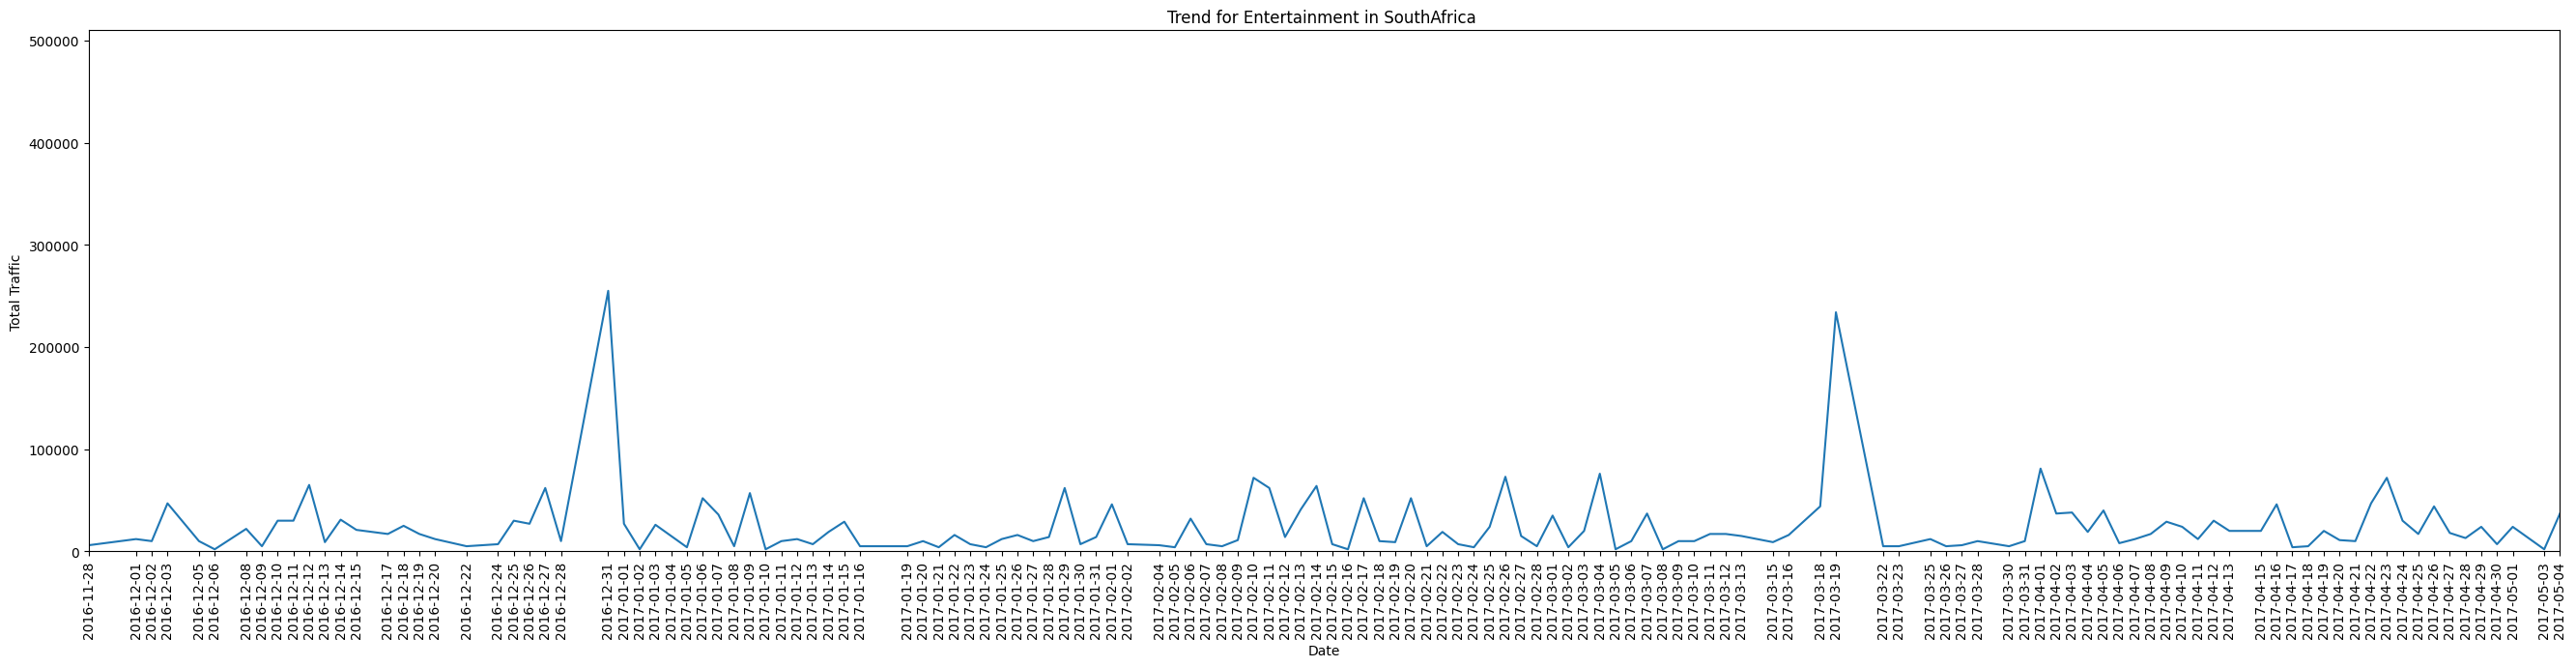

In [21]:
df['date'] = pd.to_datetime(df['date'])
maxTraffic = df['traffic_numeric'].max()

category_time_distribution = df.groupby(['date', 'general_label'])['traffic_numeric'].sum().reset_index(name='total_traffic')
specific_category_data = category_time_distribution[category_time_distribution['general_label'] == specific_category]

plt.figure(figsize=(33, 7))
sns.lineplot(data=specific_category_data, x='date', y='total_traffic')
plt.title(f"Trend for {specific_category} in {country} ")
plt.xlabel("Date")
plt.ylabel("Total Traffic")
plt.xticks(specific_category_data['date'], rotation=90)

plt.ylim(0, maxTraffic+10000)

start_date = pd.to_datetime('2016-11-28')
end_date = pd.to_datetime('2017-05-04')

plt.xlim(start_date, end_date)

plt.show()

In [22]:
df

,date,predicted_label,traffic,general_label,traffic_numeric
0,2016-11-28,history,"2,000+",Intellectualism,2000
1,2016-11-28,media and entertainment,"2,000+",Entertainment,2000
2,2016-11-28,technology,"2,000+",Technology and Science,2000
3,2016-11-28,technology,"5,000+",Technology and Science,5000
4,2016-11-28,media and entertainment,"2,000+",Entertainment,2000
...,...,...,...,...,...
928,2017-05-04,sports,"10,000+",Entertainment,10000
929,2017-05-04,history,"10,000+",Intellectualism,10000
930,2017-05-04,celebrity,"5,000+",Entertainment,5000
931,2017-05-04,sports,"5,000+",Entertainment,5000


In [23]:
category_time_distribution

,date,general_label,total_traffic
0,2016-11-28,Entertainment,6000
1,2016-11-28,Geopolitical,25000
2,2016-11-28,Intellectualism,2000
3,2016-11-28,Technology and Science,7000
4,2016-11-29,Lifestyle,10000
...,...,...,...
432,2017-05-02,Lifestyle,12000
433,2017-05-03,Entertainment,2000
434,2017-05-04,Entertainment,37000
435,2017-05-04,Intellectualism,10000


In [24]:
specific_category_data

,date,general_label,total_traffic
0,2016-11-28,Entertainment,6000
7,2016-12-01,Entertainment,12000
12,2016-12-02,Entertainment,10000
15,2016-12-03,Entertainment,47000
18,2016-12-05,Entertainment,10000
...,...,...,...
422,2017-04-29,Entertainment,24000
424,2017-04-30,Entertainment,7000
427,2017-05-01,Entertainment,24000
433,2017-05-03,Entertainment,2000
